##PointNet for Object Classification and Part Segmentation Using the ScanObjectNN Dataset

**Team Members:**

Mridul Bhattarai

Hossein Asgaribakhtiari

George Ayobami Thomas

###Mounting Drive

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
#Cloning Git repository for pointnet
!git clone https://github.com/fxia22/pointnet.pytorch

Cloning into 'pointnet.pytorch'...
remote: Enumerating objects: 213, done.
remote: Total 213 (delta 0), reused 0 (delta 0), pack-reused 213 (from 2)
Receiving objects: 100% (213/213), 229.91 KiB | 923.00 KiB/s, done.
Resolving deltas: 100% (125/125), done.


In [3]:
#This is our home directory
home = '/content/pointnet.pytorch/'

import os
os.chdir(home) #change the working directory to home


In [4]:
#Install the package in editable mode
!pip install -e .

Obtaining file:///content/pointnet.pytorch
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Unins

In [5]:
!bash {home}/scripts/build.sh #build C++ code for visualization

/content/pointnet.pytorch/scripts


###Downloading the Dataset

Before downloading the dataset, we first update the dataset link in the download.sh file. The dataset is extracted into a folder named 'object_dataset_complete_with_parts ', which contains an unintended trailing space. This extra space can cause issues when working with file paths, so we rename the folder to remove the trailing space for smoother processing.

In [6]:
#Edit download.sh file to download a different (ScanObjectNN) dataset
import os

# New dataset link
new_wget_link = "https://hkust-vgd.ust.hk/scanobjectnn/raw/object_dataset_complete_with_parts%20.zip"

# Actual zip file name (with literal space)
new_zip_name = "object_dataset_complete_with_parts .zip"

new_zip_name_shell = f'"{new_zip_name}"'

# New safe file name (without space)
safe_zip_name = "object_dataset_complete_with_parts.zip"
safe_zip_name_shell = f'"{safe_zip_name}"'

# Path to the original file
original_file = "/content/pointnet.pytorch/scripts/download.sh"

# Check if file exists
if not os.path.exists(original_file):
    raise FileNotFoundError(f"File not found: {original_file}")

# Read original lines
with open(original_file, 'r') as f:
    lines = f.readlines()

# Replace wget line and any zip file references — also insert mv command after wget to rename file
edited_lines = []
for i, line in enumerate(lines):
    stripped = line.strip()
    if stripped.startswith("wget "):
        # Replace wget line
        edited_lines.append(f"wget {new_wget_link} --no-check-certificate\n")
        # Insert mv line right after
        edited_lines.append(f"mv {new_zip_name_shell} {safe_zip_name_shell}\n")
    elif "shapenetcore_partanno_segmentation_benchmark_v0.zip" in line:
        # Replace old zip name references with new safe zip name
        edited_lines.append(line.replace("shapenetcore_partanno_segmentation_benchmark_v0.zip", safe_zip_name))
    else:
        edited_lines.append(line)

# Write back the updated file
with open(original_file, 'w') as f:
    f.writelines(edited_lines)

print(f"\n Updated {original_file} successfully with mv and safe zip handling.")






 Updated /content/pointnet.pytorch/scripts/download.sh successfully with mv and safe zip handling.


In [7]:
!bash {home}scripts/download.sh #Download dataset

Streaming output truncated to the last 5000 lines.
  inflating: object_dataset_complete_with_parts /shelf/201_00002.bin  
  inflating: object_dataset_complete_with_parts /shelf/scene0646_00_00025_part.xml  
  inflating: object_dataset_complete_with_parts /shelf/scene0646_00_00025_part.bin  
  inflating: object_dataset_complete_with_parts /shelf/scene0646_00_00019_part.xml  
  inflating: object_dataset_complete_with_parts /shelf/scene0646_00_00019_part.bin  
  inflating: object_dataset_complete_with_parts /shelf/scene0646_00_00018_part.xml  
  inflating: object_dataset_complete_with_parts /shelf/scene0646_00_00018_part.bin  
  inflating: object_dataset_complete_with_parts /shelf/scene0646_00_00013_part.xml  
  inflating: object_dataset_complete_with_parts /shelf/scene0646_00_00013_part.bin  
  inflating: object_dataset_complete_with_parts /shelf/scene0645_00_00025_part.xml  
  inflating: object_dataset_complete_with_parts /shelf/scene0645_00_00025_part.bin  
  inflating: object_dataset_

In [8]:
%mv /content/pointnet.pytorch/object_dataset_complete_with_parts* /content/pointnet.pytorch/object_dataset_complete_with_parts


# Preparing Dataset
Now that the dataset has been downloaded, we need to modify the dataset.py file located at /content/pointnet.pytorch/pointnet/dataset.py in our Colab environment. This file handles all data preparation tasks for both classification and part segmentation.

So, what we are doing here is replacing the old code with our new code to the file dataset.py.

In [9]:
dataset_file_path="/content/pointnet.pytorch/pointnet/dataset.py"

new_code="""
from __future__ import print_function
import torch.utils.data as data
import pandas as pd
import os
import os.path
import torch
import numpy as np
import sys
from tqdm import tqdm
import json

SCANOBJECTNN_CLASSES = {
    0: "bag",
    1: "bin",
    2: "box",
    3: "cabinet",
    4: "chair",
    5: "desk",
    6: "display",
    7: "door",
    8: "shelf",
    9: "table",
    10: "bed",
    11: "pillow",
    12: "sink",
    13: "sofa",
    14: "toilet"
}

root="/content/pointnet.pytorch/object_dataset_complete_with_parts"

def get_segmentation_classes(root, split='train'):
    split_file = os.path.join(root, 'split_new.txt')
    cat = {}   # Mapping from file name to class id (based on split)
    meta = {}
    datapath = []  # Collects (class_id, point_path, seg_path)

    with open(split_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            filename = parts[0]
            class_id = parts[1]
            cat[filename] = class_id # 038_00032.bin =	0 (0 is bag)

    for filename in cat:
        class_id = int(cat[filename])
        print (class_id)
        class_name = SCANOBJECTNN_CLASSES[class_id]
        class_dir = os.path.join(root, class_name)
        meta[filename] = []

        token = os.path.splitext(filename)[0]
        point_path = os.path.join(class_dir, token + '.bin')
        seg_path = os.path.join(class_dir, token + '_part.bin')

        meta[filename].append((point_path, seg_path))
        datapath.append((class_id, point_path, seg_path))

    # Track max part labels per class_id
    class_max_seg = {}

    for point_path, seg_path in meta[filename]:
        try:
            raw = np.fromfile(seg_path, dtype=np.float32)[1:]  # Skip first entry
            if len(raw) % 2 != 0:
                raise ValueError(f"Malformed data in {seg_path}")
            labels = pd.DataFrame(raw.reshape(-1, 2), columns=["point_number", "label"])['label']
            num_parts = len(np.unique(labels))
            class_max_seg[class_id] = max(class_max_seg.get(class_id, 0), num_parts)
        except Exception as e:
            print(f"Error in {seg_path}: {e}")

    # Write and print results in order of class_id
    output_file = os.path.join(os.path.dirname(os.path.realpath(__file__)), '../misc/num_seg_classes.txt')
    with open(output_file, 'w') as f:
        for class_id in sorted(class_max_seg):
            class_name = SCANOBJECTNN_CLASSES[class_id]
            max_parts = class_max_seg[class_id]
            print(f"category {class_name} has {max_parts} part segmentation classes")
            f.write(f"{class_name}	{max_parts}")


def gen_modelnet_id(root):
    split_file = os.path.join(root, 'split_new.txt')
    class_ids = set()

    with open(split_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            class_ids.add(int(parts[1]))

    output_file = os.path.join(os.path.dirname(os.path.realpath(__file__)), '../misc/modelnet_id.txt')
    with open(output_file, 'w') as f:
        for class_id in sorted(class_ids):
            class_name = SCANOBJECTNN_CLASSES[class_id]
            f.write(f"{class_name}	{class_id}")

class ScanObjectNN_PartSeg(data.Dataset):
    def __init__(self,
                 root,
                 npoints=2500,
                 classification=False,
                 class_choice=None,
                 split='train',
                 data_augmentation=True):
        self.npoints = npoints
        self.root = root
        self.data_augmentation = data_augmentation
        self.classification = classification
        self.seg_classes = {}
        self.cat = {}
        self.all_unique_parts = set()


        # Load split file and filter based on split and class_choice
        split_file = os.path.join(root, 'split_new.txt')
        with open(split_file, 'r') as f:
            lines = [line.strip().split() for line in f.readlines()]
        for parts in lines:
            filename = parts[0]
            class_id1 = int(parts[1])
            # Handle split logic based on presence of third column
            if split == 'test':
                if len(parts) < 3:
                    continue  # Skip if 't' is not present for test
            elif split == 'train':
                if len(parts) >= 3:
                    continue  # Skip if 't' is present for train
            class_name1 = SCANOBJECTNN_CLASSES[class_id1]

            if class_choice is not None and class_name1 not in class_choice:
                continue
            self.cat[filename] = class_id1

        # Build meta dictionary
        self.meta = {}
        self.datapath= []
        for filename in self.cat:
            class_id2 = self.cat[filename]
            class_name2 = SCANOBJECTNN_CLASSES[class_id2]
            token = os.path.splitext(filename)[0]
            class_dir = os.path.join(root, class_name2)
            point_path = os.path.join(class_dir, token + '.bin')
            seg_path = os.path.join(class_dir, token + '_part.bin')
            if filename not in self.meta:
                self.meta[filename] = []
            self.meta[filename].append((point_path, seg_path))
            self.datapath.append((class_name2, point_path, seg_path))


        max_parts = 0
        all_unique_parts = set()  # To collect all unique part labels across files

        for filename in self.meta:
            class_id2 = self.cat[filename]
            class_name2 = SCANOBJECTNN_CLASSES[class_id2]

            # Directly get the single tuple (point_path, seg_path)
            point_path, seg_path = self.meta[filename][0]

            try:
                raw = np.fromfile(seg_path, dtype=np.float32)[1:]  # Skip first entry
                if len(raw) % 2 != 0:
                    raise ValueError(f"Malformed data in {seg_path}")

                labels = pd.DataFrame(raw.reshape(-1, 2), columns=["point_number", "label"])['label']
                unique_labels = np.unique(labels).astype(int)

                all_unique_parts.update(unique_labels)
                num_unique_labels = len(np.unique(labels))
                max_parts = max(max_parts, num_unique_labels)

            except Exception as e:
                print(f"Error in {seg_path}: {e}")
        self.num_seg_classes = max_parts
        self.all_unique_parts = sorted(all_unique_parts)

    def __len__(self):
        return len(self.datapath)

    def __getitem__(self, index):
        # Get class ID, and paths to point cloud and segmentation files
        class_id, point_path, seg_path = self.datapath[index]

        # Load the point cloud (skip the first float, then reshape)
        point_raw = np.fromfile(point_path, dtype=np.float32)[1:].reshape(-1, 11)
        point_set = point_raw[:, :3]  # Only keep x, y, z

        # Load segmentation labels (skip first float, then reshape)
        seg_raw = np.fromfile(seg_path, dtype=np.float32)[1:].reshape(-1, 2)
        seg = seg_raw[:, 1].astype(np.int64)  # Use label column

        # Subsample or duplicate points to match self.npoints
        if len(seg) < self.npoints:
            choice = np.random.choice(len(seg), self.npoints, replace=True)
        else:
            choice = np.random.choice(len(seg), self.npoints, replace=False)

        point_set = point_set[choice, :]
        seg = seg[choice]

        # Convert to PyTorch tensors
        point_set = torch.from_numpy(point_set.astype(np.float32))
        seg = torch.from_numpy(seg.astype(np.int64))

        if self.classification:
            # Map class_id to integer label
            class_name = SCANOBJECTNN_CLASSES[class_id]
            cls = self.classes[class_name]
            return point_set, cls
        else:
            return point_set, seg


class ScanObjectNN_Classify(data.Dataset):
    def __init__(self,
                 root,
                 npoints=2048,
                 split='train',
                 split_file='split_new.txt',
                 data_augmentation=True):
        self.root = root
        self.npoints = npoints
        self.split = split
        self.data_augmentation = data_augmentation
        self.fns = []
        self.labels = []
        self.cat = SCANOBJECTNN_CLASSES
        self.classes = SCANOBJECTNN_CLASSES


        split_path = os.path.join(root, split_file)
        with open(split_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                filename = parts[0]
                class_id = int(parts[1])
                # Handle split logic based on presence of third column
                if split == 'test':
                    if len(parts) < 3 or parts[2] != 't':
                        continue  # Skip if 't' is not present for test
                elif split == 'train':
                    if len(parts) >= 3 and parts[2] == 't':
                        continue  # Skip if 't' is present for train
                class_name = self.cat[class_id]
                rel_path = os.path.join(class_name, filename)
                self.fns.append(rel_path)
                self.labels.append(class_id)

        print(f"[{split.upper()}] Loaded {len(self.fns)} samples.")

    def __len__(self):
        return len(self.fns)

    def __getitem__(self, index):
        rel_path = self.fns[index]
        label = self.labels[index]
        full_path = os.path.join(self.root, rel_path)

        raw_data = np.fromfile(full_path, dtype=np.float32)
        point_data = raw_data[1:].reshape(-1, 11)  # remove first point (1 floats), reshape
        pointcloud = point_data[:, :3]  # keep only XYZ


        # Sample or pad
        if pointcloud.shape[0] >= self.npoints:
            idx = np.random.choice(pointcloud.shape[0], self.npoints, replace=False)
        else:
            idx = np.random.choice(pointcloud.shape[0], self.npoints, replace=True)
        pointcloud = pointcloud[idx]

        # Center and scale
        pointcloud = pointcloud - np.mean(pointcloud, axis=0, keepdims=True)
        scale = np.max(np.sqrt(np.sum(pointcloud ** 2, axis=1)))
        pointcloud = pointcloud / scale

        # Augmentation
        if self.data_augmentation:
            theta = np.random.uniform(0, 2 * np.pi)
            rot_mat = np.array([
                [np.cos(theta), 0, -np.sin(theta)],
                [0, 1, 0],
                [np.sin(theta), 0, np.cos(theta)]
            ])
            pointcloud = pointcloud @ rot_mat
            pointcloud += np.random.normal(0, 0.02, size=pointcloud.shape)

        return pointcloud.astype(np.float32), np.array(label, dtype=np.int64)


if __name__ == '__main__':
    dataset = sys.argv[1]
    datapath = sys.argv[2]

    if dataset == 'ScanObjectNN_PartSeg':
        d = ScanObjectNN_PartSeg(root=datapath, class_choice=['chair'])
        print(len(d))
        ps, seg = d[0]
        print(ps.shape, ps.dtype, seg.shape, seg.dtype)

        d = ScanObjectNN_PartSeg(root=datapath, classification=True)
        print(len(d))
        ps, cls = d[0]
        print(ps.shape, ps.dtype, cls.shape, cls.dtype)

    if dataset == 'ScanObjectNN_Classify':
        dataset_obj = ScanObjectNN_Classify(root=datapath)

        print(f"Loaded {len(dataset_obj)} samples from ScanObjectNN for classification.")

        # Fetch the first sample (point cloud and class label)
        pointcloud, label = dataset_obj[0]

        print(f"Point cloud shape in first sample: {pointcloud.shape}, dtype: {pointcloud.dtype}")
        print(f"Label shape in first sample: {label.shape}, dtype: {label.dtype}")




"""
# Check if the file exists before writing
if os.path.exists(dataset_file_path):
    with open(dataset_file_path, 'w') as f:
        f.write(new_code)
    print(f"Updated {dataset_file_path} with new code.")
else:
    print(f"Error: The file {dataset_file_path} does not exist.")


Updated /content/pointnet.pytorch/pointnet/dataset.py with new code.


#Classification: Train, Test, and Plot Results

The code below replaces the train_classification file with our custom implementation for training and testing on the ScanObjectNN dataset. It also saves the training and testing results as images, which we will display later in the notebook.

For a more readable version of the code, you may want to view the train_classification file directly at its path in your Colab environment: "/content/pointnet.pytorch/utils/train_classification.py".

In [10]:
train_classification_file_path="/content/pointnet.pytorch/utils/train_classification.py"
new_train_code="""
# Import necessary libraries
from __future__ import print_function
import argparse
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import torch
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from pointnet.dataset import ScanObjectNN_Classify, ScanObjectNN_PartSeg
from pointnet.model import PointNetCls, feature_transform_regularizer
import torch.nn.functional as F
from tqdm import tqdm
import seaborn as sns
from sklearn.metrics import confusion_matrix
import h5py
import glob
import shutil


# Argument parser for training configuration
parser = argparse.ArgumentParser()
parser.add_argument(
    '--batchSize', type=int, default=32, help='input batch size')
parser.add_argument(
    '--num_points', type=int, default=2500, help='input batch size')
parser.add_argument(
    '--workers', type=int, help='number of data loading workers', default=4)
parser.add_argument(
    '--nepoch', type=int, default=250, help='number of epochs to train for')
parser.add_argument('--outf', type=str, default='cls', help='output folder')
parser.add_argument('--model', type=str, default='', help='model path')
parser.add_argument('--dataset', type=str, required=True, help="dataset path")
parser.add_argument('--dataset_type', type=str, default='shapenet', help="dataset type shapenet|modelnet40")
parser.add_argument('--feature_transform', action='store_true', help="use feature transform")
parser.add_argument('--lr', type=float, default=0.001, help='learning rate for optimizer')


# Parse command-line arguments
opt = parser.parse_args()
print(opt)

# Define a function for blue-colored text in terminal output
blue = lambda x: '\033[94m' + x + '\033[0m'
opt.manualSeed = 42  # fix seed for reproducibility

print("===================================")
print("Random Seed: ", opt.manualSeed)
print("===================================")

# Apply the seed to random and PyTorch
random.seed(opt.manualSeed)
torch.manual_seed(opt.manualSeed)

#Acquiring Data and Preparing data loaders
if opt.dataset_type == 'ScanObjectNN_Classify':
    dataset = ScanObjectNN_Classify(
        root=opt.dataset,
        npoints=opt.num_points)

    test_dataset = ScanObjectNN_Classify(
        root=opt.dataset,
        split='test',
        npoints=opt.num_points,
        data_augmentation=False)
else:
    exit('wrong dataset type')

dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=opt.batchSize,
    shuffle=True,
    num_workers=int(opt.workers))

testdataloader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=opt.batchSize,
        shuffle=True,
        num_workers=int(opt.workers))



print(" Number of Train Dataset : ", len(dataset),"    ;     Number of Test Dataset : ", len(test_dataset))
num_classes = len(dataset.classes)
print(" Number of classes:",num_classes)
print("==================================")
# Class Label Mappings for ScanObjectNN
class_label_map = {
    0: 'bag',
    1: 'bin',
    2: 'box',
    3: 'cabinet',
    4: 'chair',
    5: 'desk',
    6: 'display',
    7: 'door',
    8: 'shelf',
    9: 'table',
    10: 'bed',
    11: 'pillow',
    12: 'sink',
    13: 'sofa',
    14: 'toilet'
}
print("Class Index | Class Name")
print("-------------------------")
for idx, name in class_label_map.items():
    print(f"{idx:^11} | {name}")
try:
    os.makedirs(opt.outf)
except OSError:
    pass

classifier = PointNetCls(k=num_classes, feature_transform=opt.feature_transform)

if opt.model != '':
    classifier.load_state_dict(torch.load(opt.model))

optimizer = optim.Adam(classifier.parameters(), lr=opt.lr, betas=(0.9, 0.999))
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
classifier.to(device)


#Creating Directory to store results
results_dir = "classification_results"
os.makedirs(results_dir, exist_ok=True)# Create directory if not exists

num_batch = len(dataset) / opt.batchSize
train_accuracies = []
test_accuracies = []

for epoch in range(opt.nepoch):
    scheduler.step()

    epoch_train_correct = 0
    total_train_samples = 0

    epoch_test_correct = 0
    total_test_samples = 0

    all_train_preds = []   # Will hold all test preds in epoch
    all_train_labels = []  # Will hold all test true labels

    for i, data in enumerate(dataloader, 0):
        points, target = data
        target = target
        points = points.transpose(2, 1)
        points, target = points.to(device), target.to(device)
        optimizer.zero_grad()
        classifier = classifier.train()
        pred, trans, trans_feat = classifier(points)
        loss = F.nll_loss(pred, target)
        if opt.feature_transform:
            loss += feature_transform_regularizer(trans_feat) * opt.lr
        loss.backward()
        optimizer.step()
        pred_choice = pred.data.max(1)[1]
        correct = pred_choice.eq(target.data).cpu().sum()

        epoch_train_correct += correct
        total_train_samples += target.size(0)

        # Accumulate train predictions and labels for confusion matrix
        all_train_preds.append(pred_choice.cpu().numpy())
        all_train_labels.append(target.cpu().numpy())


        print('[%d: %d/%d] train loss: %f accuracy: %f' % (epoch, i, num_batch, loss.item(), correct.item() / float(opt.batchSize)))

        if i % 10 == 0:
            j, data = next(enumerate(testdataloader, 0))
            points, target = data
            target = target
            points = points.transpose(2, 1)
            points, target = points.to(device), target.to(device)
            classifier = classifier.eval()
            pred, _, _ = classifier(points)
            loss = F.nll_loss(pred, target)
            pred_choice = pred.data.max(1)[1]
            correct = pred_choice.eq(target.data).cpu().sum()

            epoch_test_correct += correct
            total_test_samples += target.size(0)

            print("-----------------------------------------------------------------------------------")
            print('[%d: %d/%d] %s loss: %f accuracy: %f' % (epoch, i, num_batch, blue('test'), loss.item(), correct.item()/float(opt.batchSize)))
            print("-----------------------------------------------------------------------------------")
    # Calculate accuracy for the epoch
    train_accuracy = epoch_train_correct / total_train_samples
    test_accuracy = epoch_test_correct / total_test_samples if total_test_samples > 0 else 0.0

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Concatenate test preds and labels to compute confusion matrix
    all_train_preds = np.concatenate(all_train_preds)
    all_train_labels = np.concatenate(all_train_labels)


    cf_plot_path = os.path.abspath(os.path.join(results_dir, "Confusion_Matrix" + str(epoch) + ".png"))

    # Compute confusion matrix
    cm = confusion_matrix(all_train_labels, all_train_preds)

    # Plot the matrix
    plt.figure(figsize=(14,12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - Epoch {epoch}')
    plt.savefig(cf_plot_path)
    plt.close()

    print("-------------------------------------------------------")
    print("********************************************************")
    print("-------------------------------------------------------")
    print("Epoch ",epoch,"Summary:")
    print("Train Accuracy", train_accuracy)
    print("Test Accuracy",test_accuracy)
    print("-------------------------------------------------------")
    print("********************************************************")
    print("-------------------------------------------------------")

    torch.save(classifier.state_dict(), '%s/cls_model_%d.pth' % (opt.outf, epoch))

final_cm_path = os.path.abspath(os.path.join(results_dir, "Confusion_Matrix" + str(opt.nepoch - 1) + ".png"))
print(f"Confusion matrix from last epoch saved at: {final_cm_path}")

# Accuracy Versus Number of Epochs Plot
plt.figure(figsize=(10, 6))
epochs = range(len(train_accuracies))  # x-axis: epochs

plt.plot(epochs, train_accuracies, marker='o', label='Train Accuracy', color='blue')
plt.plot(epochs, test_accuracies, marker='s', label='Test Accuracy', color='orange')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs Epoch')

plt.xlim(left=0)      # x-axis starts exactly at 0
plt.ylim(bottom=0, top=1)  # y-axis between 0 and 1

plt.xticks(list(epochs))  # show all epoch ticks
plt.yticks([i/10 for i in range(0, 11)])  # y-ticks every 0.1

plt.grid(True)
plt.legend()
plt.tight_layout()

# Save plot instead of showing
plot_path = os.path.abspath(os.path.join(results_dir, "test_train_accuracy_classification.png"))
plt.savefig(plot_path)
plt.close()

print(f"Accuracy Versus Number of Epochs plot saved at: {plot_path}")


#Total correct and total test files
total_correct = 0
total_testset = 0

# Save correctly and incorrectly classified samples
correct_samples_saved = 0
incorrect_samples_saved = 0
max_samples_to_save = 3

images_dir=os.path.join(results_dir, 'images')
# Create images directory if it doesn't exist
os.makedirs(images_dir, exist_ok=True)

# Clean the images directory (delete all files inside it)
for f in glob.glob(os.path.join(images_dir, '*')):
    os.remove(f)

for i,data in tqdm(enumerate(testdataloader, 0)):
    points, target = data
    points_original = points.clone()  # Keep a copy of original points for saving
    target = target
    points = points.transpose(2, 1)
    points, target = points.to(device), target.to(device)
    classifier = classifier.eval()
    with torch.no_grad():
        pred, _, _ = classifier(points)

    pred_choice = pred.data.max(1)[1]
    correct = pred_choice.eq(target.data).cpu().sum()
    total_correct += correct.item()
    total_testset += points.size()[0]

    # Save samples if needed
    pred_choice_cpu = pred_choice.cpu()
    target_cpu = target.cpu()
    for idx in range(points_original.size(0)):
        if correct_samples_saved >= max_samples_to_save and incorrect_samples_saved >= max_samples_to_save:
            continue  # skip saving once both limits reached

        is_correct = (pred_choice_cpu[idx] == target_cpu[idx]).item()
        sample_points = points_original[idx].numpy()
        true_label = target_cpu[idx].item()
        pred_label = pred_choice_cpu[idx].item()

        if is_correct and correct_samples_saved < max_samples_to_save:
            filename = "correct_{}_true{}_pred{}.h5".format(correct_samples_saved, true_label, pred_label)
            filepath = os.path.join(images_dir, filename)
            with h5py.File(filepath, 'w') as f:
                f.create_dataset('points', data=sample_points)
                f.create_dataset('true_label', data=true_label)
                f.create_dataset('pred_label', data=pred_label)
            correct_samples_saved += 1

        elif not is_correct and incorrect_samples_saved < max_samples_to_save:
            filename = "incorrect_{}_true{}_pred{}.h5".format(incorrect_samples_saved, true_label, pred_label)
            filepath = os.path.join(images_dir, filename)
            with h5py.File(filepath, 'w') as f:
                f.create_dataset('points', data=sample_points)
                f.create_dataset('true_label', data=true_label)
                f.create_dataset('pred_label', data=pred_label)
            incorrect_samples_saved += 1

print("=============================================================")
print("final accuracy {}".format(total_correct / float(total_testset)))
print("=============================================================")
"""

# Check if the file exists before writing
if os.path.exists(train_classification_file_path):
    with open(train_classification_file_path, 'w') as f:
        f.write(new_train_code)
    print(f"Updated {train_classification_file_path} with new code.")
else:
    print(f"Error: The file {train_classification_file_path} does not exist.")

Updated /content/pointnet.pytorch/utils/train_classification.py with new code.


##Training Logs and Results

**Hyperparameter Configuration 1:**

Number of epochs: 10

Learning rate: 0.001

Batch size: 32

Number of points sampled: 2000


In [68]:
!python "/content/pointnet.pytorch/utils/train_classification.py" \
  --dataset "/content/pointnet.pytorch/object_dataset_complete_with_parts" \
  --nepoch 10 \
  --lr 0.001 \
  --batchSize 32 \
  --dataset_type ScanObjectNN_Classify \
  --num_points 2000


Namespace(batchSize=32, num_points=2000, workers=4, nepoch=10, outf='cls', model='', dataset='/content/pointnet.pytorch/object_dataset_complete_with_parts', dataset_type='ScanObjectNN_Classify', feature_transform=False, lr=0.001)
Random Seed:  42
[TRAIN] Loaded 2319 samples.
[TEST] Loaded 583 samples.
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
 Number of Train Dataset :  2319     ;     Number of Test Dataset :  583
 Number of classes: 15
Class Index | Class Name
-------------------------
     0      | bag
     1      | bin
     2      | box
     3      | cabinet
     4      | chair

**Accuracy Versus Number of Epochs**

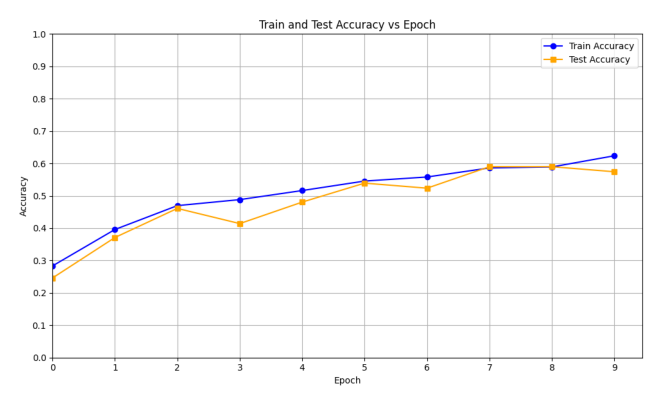

In [69]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Absolute path to the image (replace this with the actual path printed earlier)
image_path = '/content/pointnet.pytorch/classification_results/test_train_accuracy_classification.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')
plt.show()

**Confusion Matrix**

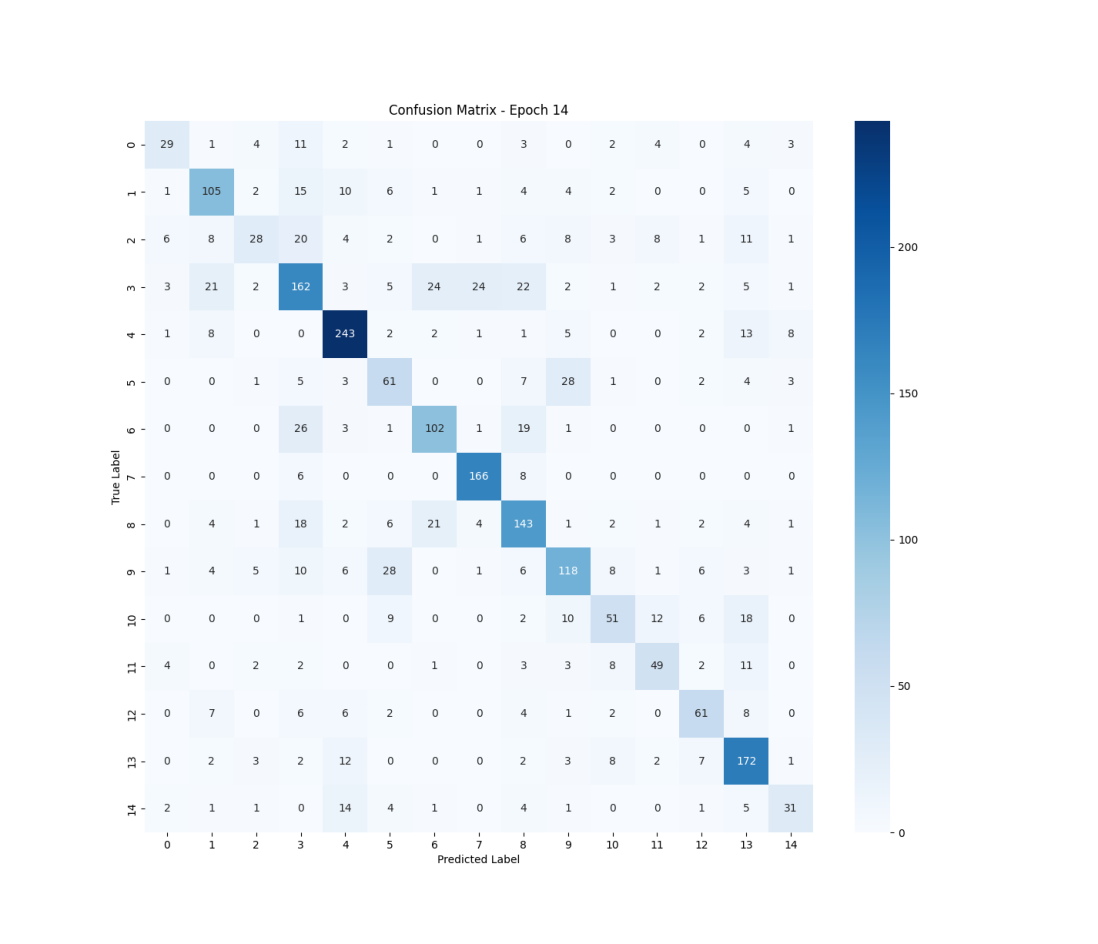

In [70]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Absolute path to the image (replace this with the actual path printed earlier)
image_path = '/content/pointnet.pytorch/classification_results/Confusion_Matrix14.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(14, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

**Prediction Results**



Visualizing up to 6 point clouds in: /content/pointnet.pytorch/classification_results/images


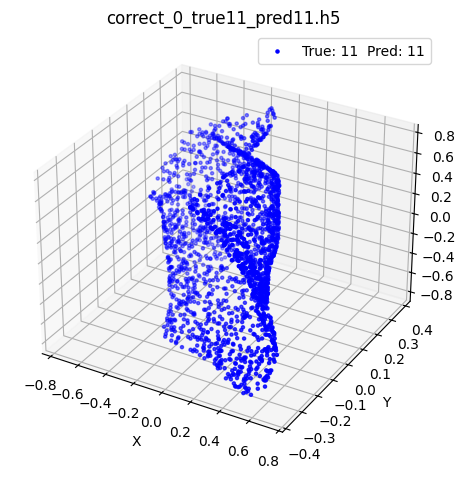

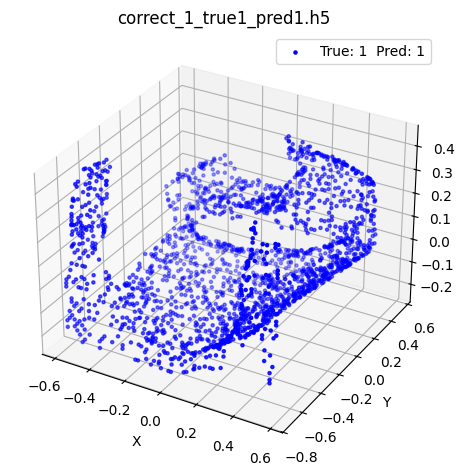

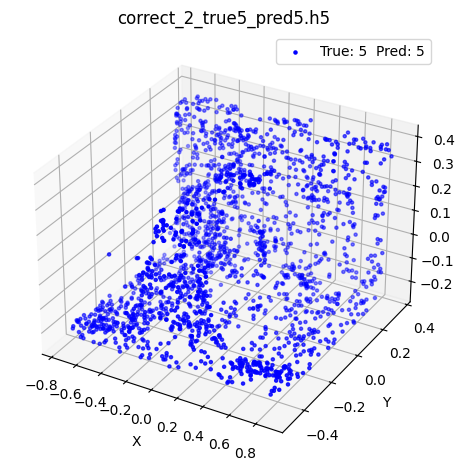

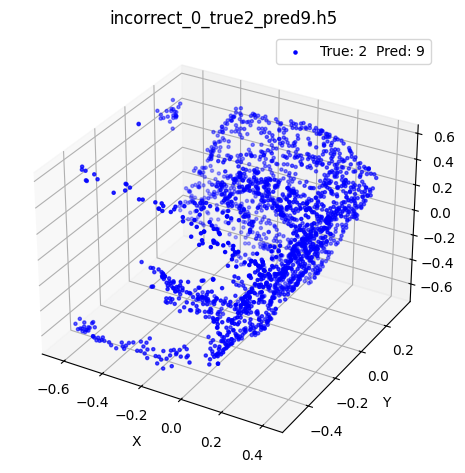

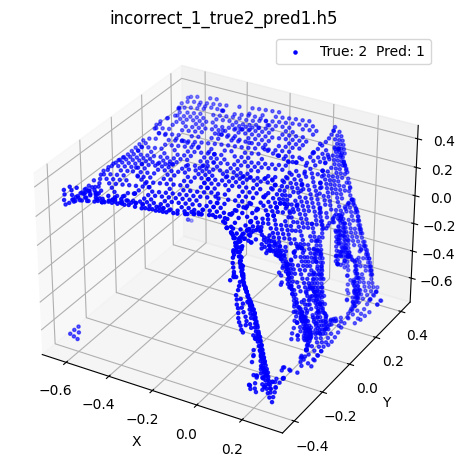

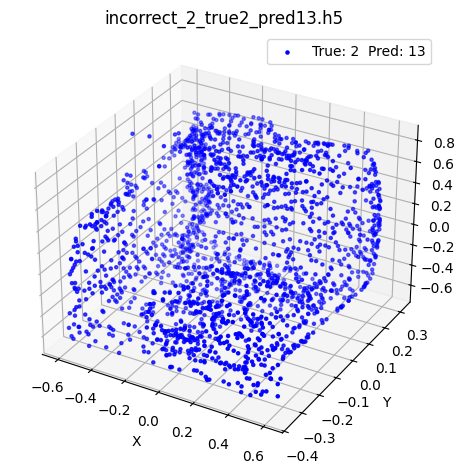

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py

def plot_point_cloud(points, true_label, pred_label, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=5, c='b', marker='o')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    legend_text = f"True: {true_label}  Pred: {pred_label}"
    plt.legend([legend_text], loc='upper right')
    plt.tight_layout()
    plt.show()

def read_h5_file(filepath):
    with h5py.File(filepath, 'r') as f:
        points = f['points'][:]
        true_label = f['true_label'][()]
        pred_label = f['pred_label'][()]

        # Decode bytes to string if needed
        if isinstance(true_label, bytes):
            true_label = true_label.decode('utf-8')
        if isinstance(pred_label, bytes):
            pred_label = pred_label.decode('utf-8')
    return points, true_label, pred_label

def visualize_all_pointclouds(folder_path, max_samples=6):
    files = sorted([f for f in os.listdir(folder_path) if f.endswith('.h5')])[:max_samples]

    if not files:
        print(f"No .h5 files found in: {folder_path}")
        return

    for file in files:
        file_path = os.path.abspath(os.path.join(folder_path, file))
        points, true_label, pred_label = read_h5_file(file_path)
        plot_point_cloud(points, true_label, pred_label, title=file)

# Set the folder where your .h5 files are saved
results_dir = '/content/pointnet.pytorch/classification_results/images'

print(f"Visualizing up to {6} point clouds in: {results_dir}")
visualize_all_pointclouds(results_dir)


**Hyperparameter Configuration 2:**

Number of epochs: 10

Learning rate: 0.003

Batch size: 32

Number of points sampled: 2000

In [72]:
!python "/content/pointnet.pytorch/utils/train_classification.py" \
  --dataset "/content/pointnet.pytorch/object_dataset_complete_with_parts" \
  --nepoch 10 \
  --lr 0.003 \
  --batchSize 32 \
  --dataset_type ScanObjectNN_Classify \
  --num_points 2000


Namespace(batchSize=32, num_points=2000, workers=4, nepoch=10, outf='cls', model='', dataset='/content/pointnet.pytorch/object_dataset_complete_with_parts', dataset_type='ScanObjectNN_Classify', feature_transform=False, lr=0.003)
Random Seed:  42
[TRAIN] Loaded 2319 samples.
[TEST] Loaded 583 samples.
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
 Number of Train Dataset :  2319     ;     Number of Test Dataset :  583
 Number of classes: 15
Class Index | Class Name
-------------------------
     0      | bag
     1      | bin
     2      | box
     3      | cabinet
     4      | chair

**Accuracy Versus Number of Epochs**


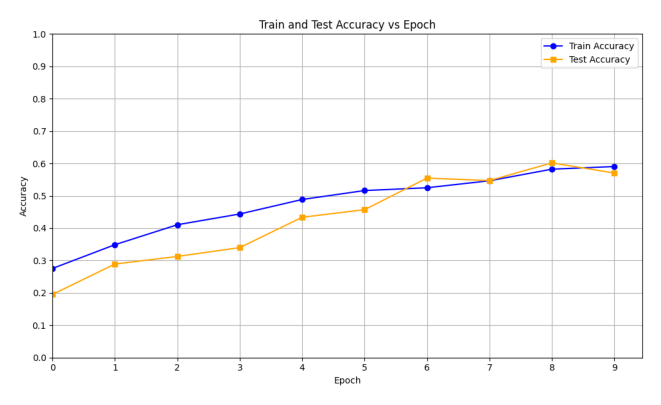

In [73]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Absolute path to the image (replace this with the actual path printed earlier)
image_path = '/content/pointnet.pytorch/classification_results/test_train_accuracy_classification.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')
plt.show()


**Confusion Matrix**

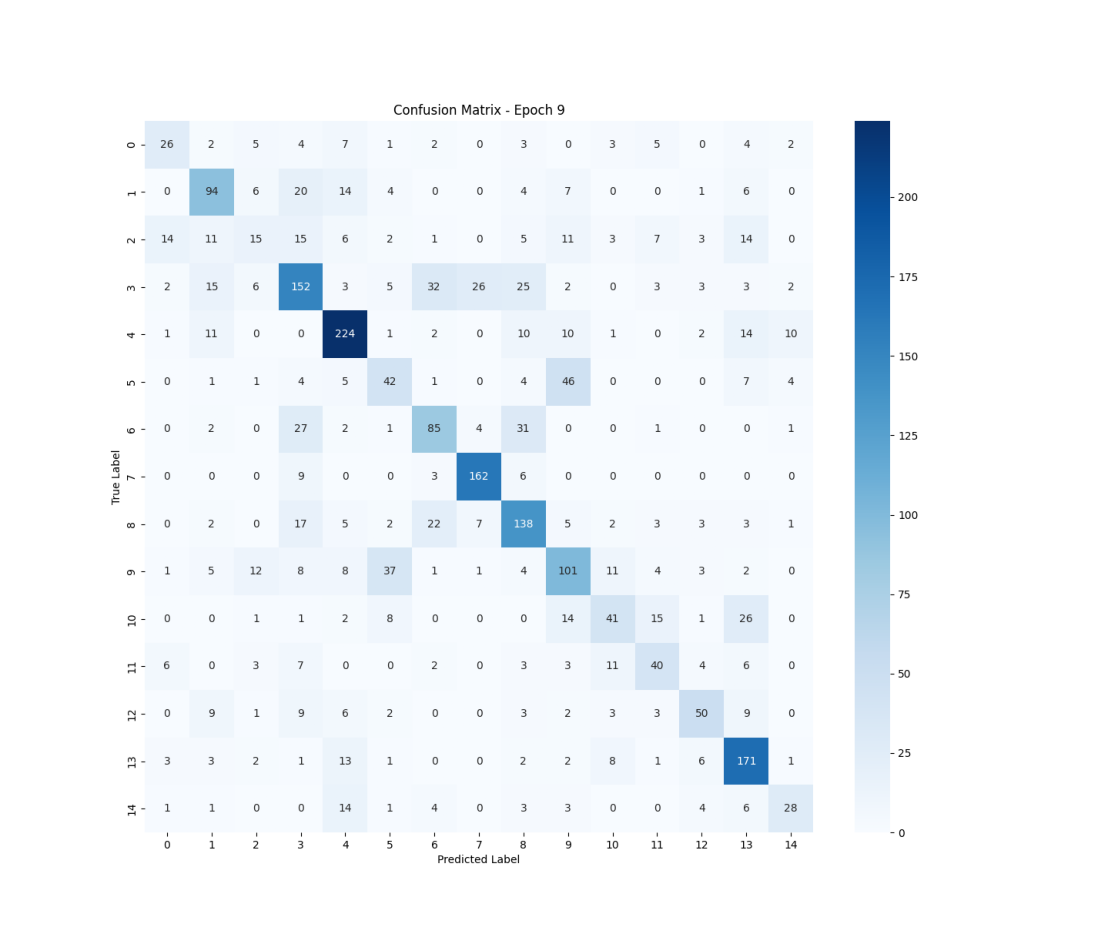

In [74]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Absolute path to the image (replace this with the actual path printed earlier)
image_path = '/content/pointnet.pytorch/classification_results/Confusion_Matrix9.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(16, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

**Hyperparameter Configuration 3:**

Number of epochs: 10

Learning rate: 0.001

Batch size: 64

Number of points sampled: 2000

In [27]:
!python "/content/pointnet.pytorch/utils/train_classification.py" \
  --dataset "/content/pointnet.pytorch/object_dataset_complete_with_parts" \
  --nepoch 10 \
  --lr 0.001 \
  --batchSize 64 \
  --dataset_type ScanObjectNN_Classify \
  --num_points 2000


Namespace(batchSize=64, num_points=2000, workers=4, nepoch=10, outf='cls', model='', dataset='/content/pointnet.pytorch/object_dataset_complete_with_parts', dataset_type='ScanObjectNN_Classify', feature_transform=False, lr=0.001)
Random Seed:  42
[TRAIN] Loaded 2319 samples.
[TEST] Loaded 583 samples.
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
 Number of Train Dataset :  2319     ;     Number of Test Dataset :  583
 Number of classes: 15
Class Index | Class Name
-------------------------
     0      | bag
     1      | bin
     2      | box
     3      | cabinet
     4      | chair

**Accuracy Versus Number of Epochs**


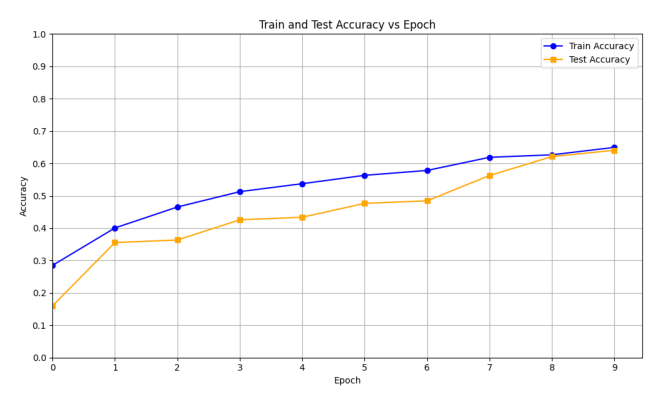

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Absolute path to the image (replace this with the actual path printed earlier)
image_path = '/content/pointnet.pytorch/classification_results/test_train_accuracy_classification.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')
plt.show()


**Confusion Matrix**

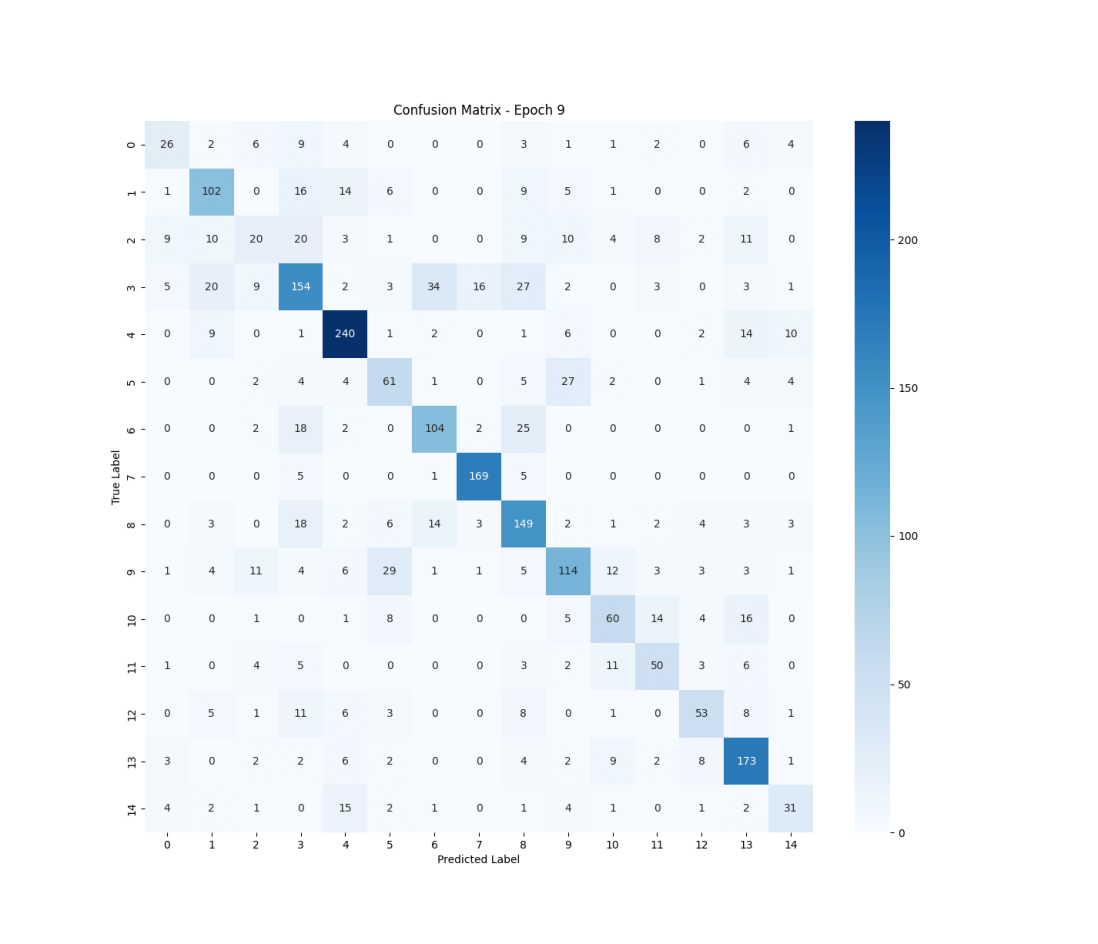

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Absolute path to the image (replace this with the actual path printed earlier)
image_path = '/content/pointnet.pytorch/classification_results/Confusion_Matrix9.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(14, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

**Hyperparameter Configuration 4:**

Number of epochs: 10

Learning rate: 0.001

Batch size: 32

Number of points sampled: 5000

In [76]:
!python "/content/pointnet.pytorch/utils/train_classification.py" \
  --dataset "/content/pointnet.pytorch/object_dataset_complete_with_parts" \
  --nepoch 10 \
  --lr 0.001 \
  --batchSize 32 \
  --dataset_type ScanObjectNN_Classify \
  --num_points 5000


Namespace(batchSize=32, num_points=5000, workers=4, nepoch=10, outf='cls', model='', dataset='/content/pointnet.pytorch/object_dataset_complete_with_parts', dataset_type='ScanObjectNN_Classify', feature_transform=False, lr=0.001)
Random Seed:  42
[TRAIN] Loaded 2319 samples.
[TEST] Loaded 583 samples.
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
 Number of Train Dataset :  2319     ;     Number of Test Dataset :  583
 Number of classes: 15
Class Index | Class Name
-------------------------
     0      | bag
     1      | bin
     2      | box
     3      | cabinet
     4      | chair

**Accuracy Versus Number of Epochs**

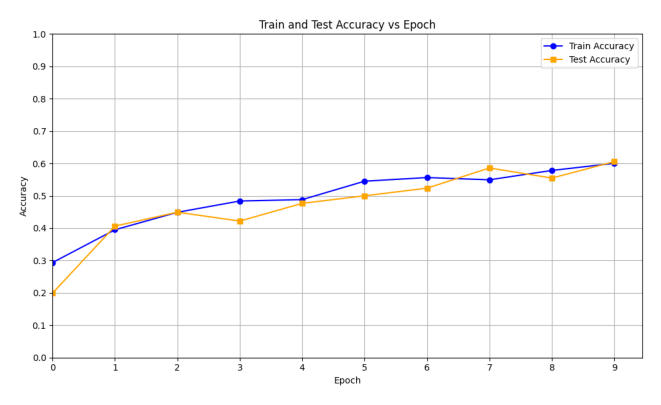

In [80]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Absolute path to the image (replace this with the actual path printed earlier)
image_path = '/content/pointnet.pytorch/classification_results/test_train_accuracy_classification.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')
plt.show()


**Confusion Matrix**

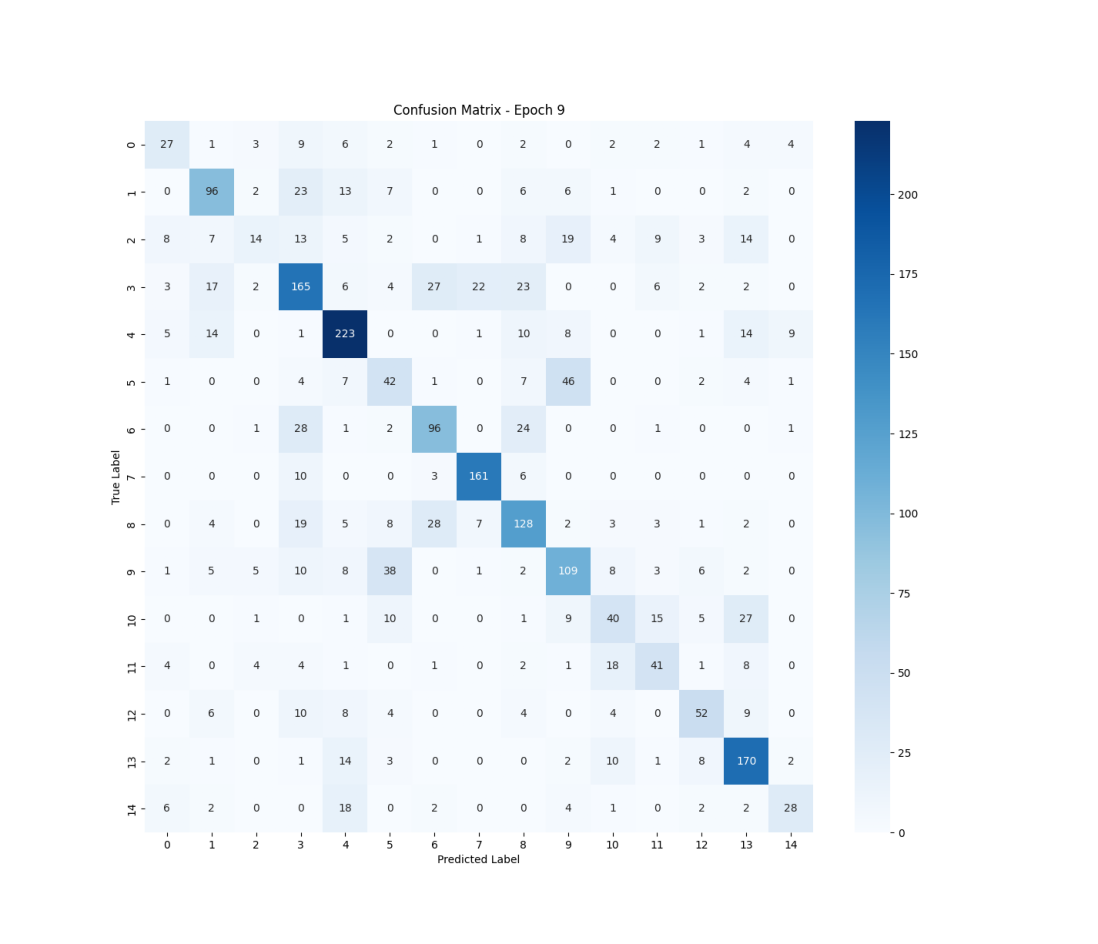

In [81]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Absolute path to the image (replace this with the actual path printed earlier)
image_path = '/content/pointnet.pytorch/classification_results/Confusion_Matrix9.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(14, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

**Predicted Samples**

Visualizing up to 6 point clouds in: /content/pointnet.pytorch/classification_results/images


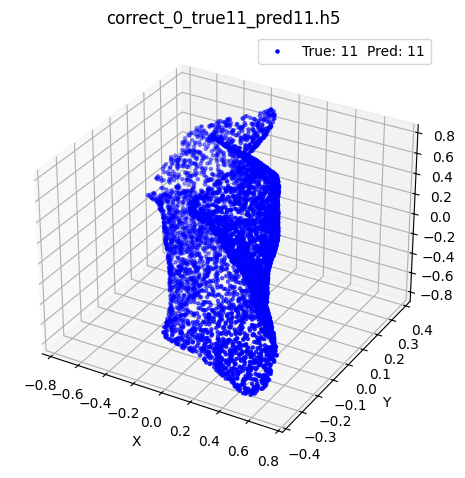

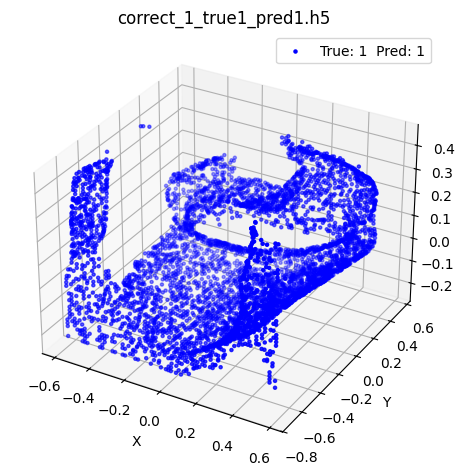

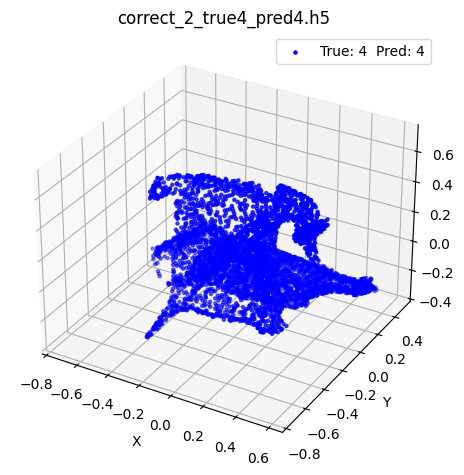

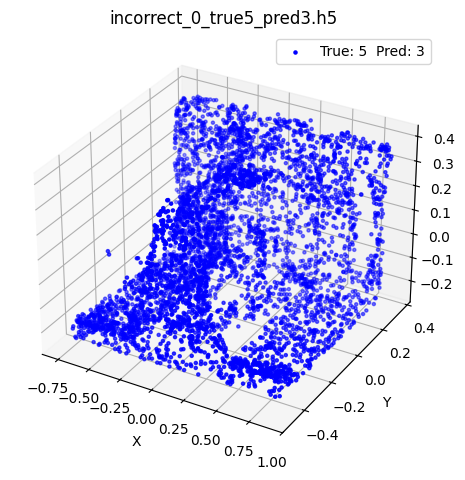

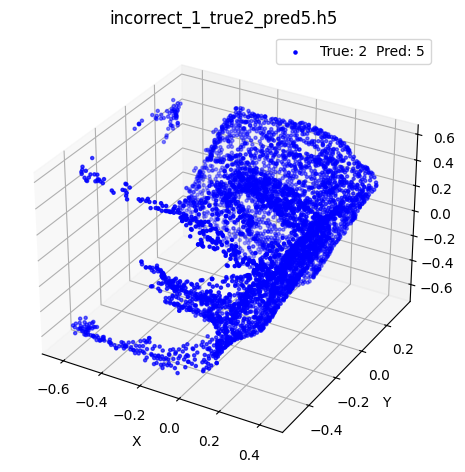

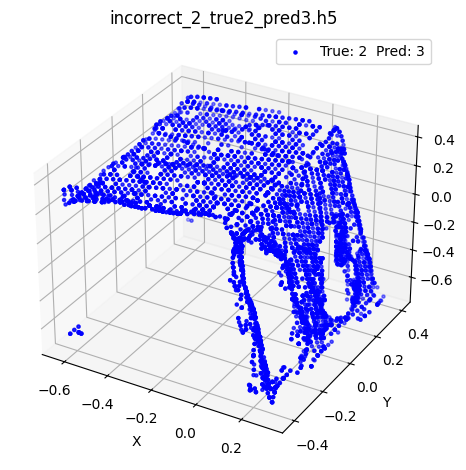

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py

def plot_point_cloud(points, true_label, pred_label, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=5, c='b', marker='o')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    legend_text = f"True: {true_label}  Pred: {pred_label}"
    plt.legend([legend_text], loc='upper right')
    plt.tight_layout()
    plt.show()

def read_h5_file(filepath):
    with h5py.File(filepath, 'r') as f:
        points = f['points'][:]
        true_label = f['true_label'][()]
        pred_label = f['pred_label'][()]

        # Decode bytes to string if needed
        if isinstance(true_label, bytes):
            true_label = true_label.decode('utf-8')
        if isinstance(pred_label, bytes):
            pred_label = pred_label.decode('utf-8')
    return points, true_label, pred_label

def visualize_all_pointclouds(folder_path, max_samples=6):
    files = sorted([f for f in os.listdir(folder_path) if f.endswith('.h5')])[:max_samples]

    if not files:
        print(f"No .h5 files found in: {folder_path}")
        return

    for file in files:
        file_path = os.path.abspath(os.path.join(folder_path, file))
        points, true_label, pred_label = read_h5_file(file_path)
        plot_point_cloud(points, true_label, pred_label, title=file)

# Set the folder where your .h5 files are saved
results_dir = '/content/pointnet.pytorch/classification_results/images'

print(f"Visualizing up to {6} point clouds in: {results_dir}")
visualize_all_pointclouds(results_dir)


#Part Segmentation: Train, Test and Plot Results

Similarly, the code below replaces the contents of the train_segmentation file with our custom implementation tailored for the ScanObjectNN dataset. While the code supports part segmentation for any single class, for the purpose of this assignment, we would later run in only in the class of our choice: "chair".

For a more readable version of the code, you can manually navigate to the file at /content/pointnet.pytorch/utils/train_segmentation in your Colab environment.

In [37]:
train_segmentation_file_path="/content/pointnet.pytorch/utils/train_segmentation.py"
new_train_seg_code= """


from __future__ import print_function
import argparse
import os
import random
import matplotlib.pyplot as plt
import torch
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from pointnet.dataset import ScanObjectNN_PartSeg, ScanObjectNN_Classify
from pointnet.model import PointNetDenseCls, feature_transform_regularizer
import torch.nn.functional as F
from tqdm import tqdm
import numpy as np
import glob
import h5py
import random


parser = argparse.ArgumentParser()
parser.add_argument(
    '--batchSize', type=int, default=32, help='input batch size')
parser.add_argument(
    '--workers', type=int, help='number of data loading workers', default=4)
parser.add_argument(
    '--nepoch', type=int, default=25, help='number of epochs to train for')
parser.add_argument('--outf', type=str, default='seg', help='output folder')
parser.add_argument('--model', type=str, default='', help='model path')
parser.add_argument('--dataset', type=str, required=True, help="dataset path")
parser.add_argument('--class_choice', type=str, default='Chair', help="class_choice")
parser.add_argument('--feature_transform', action='store_true', help="use feature transform")
parser.add_argument('--num_points', type=int, default=9000, help="Number of points to sample")
parser.add_argument('--lr', type=float, default=0.001, help='learning rate for optimizer')

opt = parser.parse_args()
print(opt)

opt.manualSeed = 42  # fix seed
print("=====================================")
print("Random Seed: ", opt.manualSeed)
random.seed(opt.manualSeed)
torch.manual_seed(opt.manualSeed)

dataset = ScanObjectNN_PartSeg(
    root=opt.dataset,
    npoints=opt.num_points,
    classification=False,
    class_choice=[opt.class_choice])
dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=opt.batchSize,
    shuffle=True,
    num_workers=int(opt.workers))

test_dataset = ScanObjectNN_PartSeg(
    root=opt.dataset,
    npoints=opt.num_points,
    classification=False,
    class_choice=[opt.class_choice],
    split='test',
    data_augmentation=False)
testdataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=opt.batchSize,
    shuffle=True,
    num_workers=int(opt.workers))

print("==========================================================")

print("Length of train dataset   =   ",len(dataset), "   ;   Length of test dataset   =   ", len(test_dataset))
print("==============================================================")
num_classes = dataset.num_seg_classes
unique_classes=dataset.all_unique_parts
print(" Class chosen for part segmentation: ",opt.class_choice)
print(" Part Segmentation Classes:", [int(x) for x in unique_classes])
print(" Number of Segmentation classes: ", num_classes)
print("=============================================================")

try:
    os.makedirs(opt.outf)
except OSError:
    pass

blue = lambda x: '[94m' + x + '[0m'

classifier = PointNetDenseCls(k=num_classes, feature_transform=opt.feature_transform)

if opt.model != '':
    classifier.load_state_dict(torch.load(opt.model))

optimizer = optim.Adam(classifier.parameters(), lr=opt.lr, betas=(0.9, 0.999))
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier.to(device)

num_batch = len(dataset) / opt.batchSize

# Build label mapping from actual label to contiguous index
label_map = {label: idx for idx, label in enumerate(unique_classes)}

mious_per_epoch = []
train_accuracies = []
test_accuracies = []

# Create a folder for storing results
part_seg_folder = "part_segmentation_results"
os.makedirs(part_seg_folder, exist_ok=True)

#Another folder to store sample predictions
prediction_folder = os.path.join(part_seg_folder, "predicted_samples")
os.makedirs(prediction_folder, exist_ok=True)


for epoch in range(opt.nepoch):
    scheduler.step()
    epoch_train_correct = 0
    total_train_points = 0

    epoch_test_correct = 0
    total_test_points = 0

    for i, data in enumerate(dataloader, 0):

        points, target = data
        points = points.transpose(2, 1)
        points, target = points.to(device), target.to(device)

        optimizer.zero_grad()
        classifier = classifier.train()
        pred, trans, trans_feat = classifier(points)

        pred = pred.view(-1, num_classes)
        target = target.view(-1)

        # Map non-contiguous labels to contiguous indices
        target_remapped = torch.tensor([label_map[int(t)] for t in target.cpu()], dtype=torch.long).to(device)

        loss = F.nll_loss(pred, target_remapped)

        if opt.feature_transform:
            loss += feature_transform_regularizer(trans_feat) * opt.lr

        loss.backward()
        optimizer.step()

        pred_choice = pred.data.max(1)[1]
        correct = pred_choice.eq(target_remapped.data).cpu().sum()

        # Accumulate correct points and total points
        epoch_train_correct += correct.item()
        total_train_points += target_remapped.numel()

        print('[%d: %d/%d] train loss: %f accuracy: %f' % (
            epoch, i, num_batch, loss.item(), correct.item() / float(opt.batchSize * opt.num_points)))


    # Test evaluation every 4 batches
        if i % 4 == 0:
            j, data = next(enumerate(testdataloader, 0))
            points, target = data
            points = points.transpose(2, 1)
            points, target = points.to(device), target.to(device)

            classifier = classifier.eval()

            pred, _, _ = classifier(points)

            pred = pred.view(-1, num_classes)
            target = target.view(-1)
            target_remapped = torch.tensor([label_map[int(t)] for t in target.cpu()], dtype=torch.long).to(device)

            loss = F.nll_loss(pred, target_remapped)
            pred_choice = pred.data.max(1)[1]
            correct = pred_choice.eq(target_remapped.data).cpu().sum()

            # Accumulate test correct and total points
            epoch_test_correct += correct.item()
            total_test_points += target_remapped.numel()

            print('[%d: %d/%d] %s loss: %f accuracy: %f' % (
                epoch, i, num_batch, blue('test'),
                loss.item(), correct.item() / float(opt.batchSize * opt.num_points)))

            if epoch == opt.nepoch - 1:
                B = points.shape[0]
                N = points.shape[2]

                # Convert tensors to numpy
                points_np = points.transpose(2, 1).cpu().numpy()  # (B, N, 3)
                target_np = target.view(B, N).cpu().numpy()       # (B, N)
                pred_np = pred_choice.view(B, N).cpu().numpy()    # (B, N)


                # Inverse label map: network outputs remapped label indices, so we map back to raw labels
                if label_map is not None:
                    inv_label_map = {v: k for k, v in label_map.items()}
                else:
                    inv_label_map = {i: i for i in range(num_classes)}

                save_dir = os.path.join(part_seg_folder, "predicted_samples")
                os.makedirs(save_dir, exist_ok=True)

                saved_paths = []
                counter = 0
                for sample_id in range(B):
                    if counter >= 3:
                        break

                    xyz = points_np[sample_id]              # (N, 3)
                    actual_labels = target_np[sample_id]    # (N,)
                    predicted_labels = pred_np[sample_id]   # (N,)

                    # Applying inverse label mapping to predicted labels
                    predicted_labels_raw = np.vectorize(inv_label_map.get)(predicted_labels)

                    save_path = os.path.join(save_dir, f"sample_{counter + 1}.h5")
                    with h5py.File(save_path, 'w') as hf:
                        hf.create_dataset("xyz", data=xyz.astype(np.float32))
                        hf.create_dataset("actual_raw_label", data=actual_labels.astype(np.int32))
                        hf.create_dataset("predicted_raw_label", data=predicted_labels_raw.astype(np.int32))

                    saved_paths.append(save_path)
                    counter += 1

                # Print all saved paths after the loop
                print("*****************************************************")
                print("Saving 3 random predictions from last test batch...")
                print("Saved the following sample files:")
                for path in saved_paths:
                    print(" - " + path)

    # Calculate train and test accuracy for the epoch
    train_accuracy = epoch_train_correct / total_train_points
    test_accuracy = epoch_test_correct / total_test_points

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print("====================================================")

    print(f"Epoch {epoch} summary: Train Acc = {train_accuracy:.4f}, Test Acc = {test_accuracy:.4f}")

    print("====================================================")


    torch.save(classifier.state_dict(), '%s/seg_model_%s_%d.pth' % (opt.outf, opt.class_choice, epoch))




    # Evaluating on test set
    shape_ious = []
    for i, data in tqdm(enumerate(testdataloader, 0)):
        points, target = data
        points = points.transpose(2, 1)
        points, target = points.to(device), target.to(device)
        classifier = classifier.eval()
        pred, _, _ = classifier(points)
        pred_choice = pred.data.max(2)[1]

        pred_np = pred_choice.cpu().data.numpy()
        target_np = target.cpu().numpy()
        target_np_mapped = np.vectorize(label_map.get)(target_np)

        for shape_idx in range(target_np.shape[0]):
            parts = range(num_classes)
            part_ious = []
            for part in parts:
                I = np.sum(np.logical_and(pred_np[shape_idx] == part, target_np_mapped[shape_idx] == part))
                U = np.sum(np.logical_or(pred_np[shape_idx] == part, target_np_mapped[shape_idx] == part))
                if U == 0:
                    iou = 1
                else:
                    iou = I / float(U)
                part_ious.append(iou)
            shape_ious.append(np.mean(part_ious))

    miou_epoch = np.mean(shape_ious)
    mious_per_epoch.append(miou_epoch)
    print(f"Epoch {epoch}: mIoU = {miou_epoch:.4f}")
    print("------------------------------------------")



# Plot Training and Test Accuracies Versus Epochs
plt.figure(figsize=(10, 6))
epochs = range(len(train_accuracies))

plt.plot(epochs, train_accuracies, label='Train Accuracy', color='blue', marker='o')
plt.plot(epochs, test_accuracies, label='Test Accuracy', color='red', marker='s')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title(f'Class: {opt.class_choice} Accuracy vs Epoch')
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()

# Save the plot
accuracy_plot_path = os.path.join(part_seg_folder, "accuracy_vs_epoch.png")
plt.savefig(accuracy_plot_path)
print(f"Accuracy plot saved to: {os.path.abspath(accuracy_plot_path)}")


# Plot mIoU over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(len(mious_per_epoch)), mious_per_epoch, marker='o', label='Test mIoU per Epoch', color='green')
plt.xlabel('Epoch')
plt.ylabel('mIoU')
plt.ylim(bottom=0, top=1)  # Start y-axis from 0, optionally cap at 1
plt.yticks(np.arange(0, 1.01, 0.1))  # Set y-ticks every 0.1
plt.xticks(ticks=range(0, len(mious_per_epoch)))  # x-ticks for each epoch
plt.title(f'Class: {opt.class_choice} Test mIoU vs Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()

plot_path = os.path.abspath(os.path.join(part_seg_folder, "test_miou_versus_epoch.png"))
plt.savefig(plot_path)

print(f"mIoU plot saved: {plot_path}")
"""
# Check if the file exists before writing
if os.path.exists(train_segmentation_file_path):
    with open(train_segmentation_file_path, 'w') as f:
        f.write(new_train_seg_code)
    print(f"Updated {train_segmentation_file_path} with new code.")
else:
    print(f"Error: The file {train_segmentation_file_path} does not exist.")


Updated /content/pointnet.pytorch/utils/train_segmentation.py with new code.


##Training Logs and Results (Part Segmentation)

**Hyperparameter Configuration 1:**

Number of epochs: 10

Learning rate: 0.001

Batch size: 32

Number of points sampled: 2000

In [41]:
!python "/content/pointnet.pytorch/utils/train_segmentation.py" \
  --dataset "/content/pointnet.pytorch/object_dataset_complete_with_parts" \
  --nepoch 20 \
  --num_points 2000\
  --batchSize 32 \
  --lr 0.001 \
  --class_choice "chair"




Namespace(batchSize=32, workers=4, nepoch=20, outf='seg', model='', dataset='/content/pointnet.pytorch/object_dataset_complete_with_parts', class_choice='chair', feature_transform=False, num_points=2000, lr=0.001)
Random Seed:  42
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Length of train dataset   =    286    ;   Length of test dataset   =    109
 Class chosen for part segmentation:  chair
 Part Segmentation Classes: [0, 2, 3, 4, 5]
 Number of Segmentation classes:  5
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:227: UserWarning: Detected call of `lr_schedul

**Prediction Results**

<ipython-input-42-555845d17eeb>:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.95, 1])


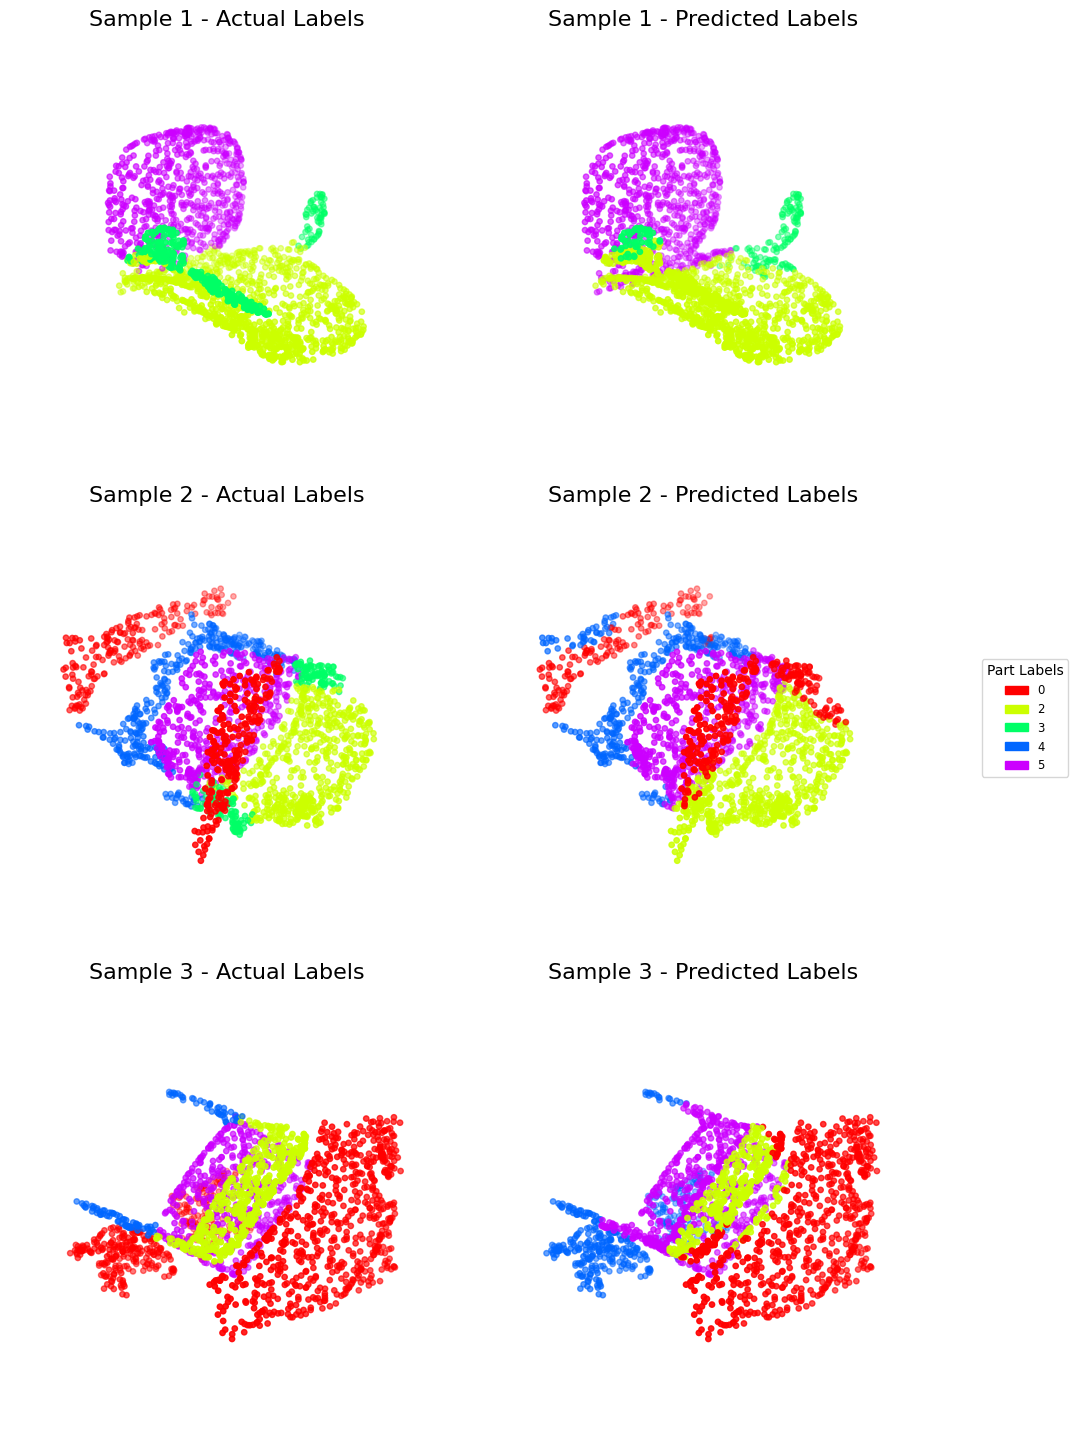

In [42]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec
from matplotlib.colors import hsv_to_rgb

h5_file_paths = [
    "part_segmentation_results/predicted_samples/sample_1.h5",
    "part_segmentation_results/predicted_samples/sample_2.h5",
    "part_segmentation_results/predicted_samples/sample_3.h5"
]

# Gather all unique labels
all_labels = set()
for path in h5_file_paths:
    with h5py.File(path, 'r') as f:
        actual = f['actual_raw_label'][:]
        predicted = f['predicted_raw_label'][:]
        all_labels.update(np.unique(actual))
        all_labels.update(np.unique(predicted))
all_labels = sorted(list(all_labels))

num_labels = len(all_labels)

# Map label to an index for color assignment
label_to_index = {label: idx for idx, label in enumerate(all_labels)}

# Generate distinct colors using HSV evenly spaced hues
def generate_distinct_colors(n):
    hues = np.linspace(0, 1, n, endpoint=False)  # hue values evenly spaced
    colors = [hsv_to_rgb([h, 1.0, 1.0]) for h in hues]  # full saturation and brightness
    return colors

distinct_colors = generate_distinct_colors(num_labels)

# Create label_colors dict mapping label -> RGB color
label_colors = {label: distinct_colors[label_to_index[label]] for label in all_labels}

def plot_pointcloud(ax, xyz, labels, title):
    ax.set_title(title, fontsize=16)
    ax.axis('off')
    colors = np.array([label_colors[label] for label in labels])
    ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=colors, s=15)
    ax.view_init(elev=20, azim=45)

fig = plt.figure(figsize=(12, 6 * len(h5_file_paths)))
gs = GridSpec(len(h5_file_paths), 2, figure=fig, wspace=0.05, hspace=0.1)

for i, path in enumerate(h5_file_paths):
    with h5py.File(path, 'r') as f:
        xyz = f['xyz'][:]
        actual_labels = f['actual_raw_label'][:]
        predicted_labels = f['predicted_raw_label'][:]

    ax_actual = fig.add_subplot(gs[i, 0], projection='3d')
    plot_pointcloud(ax_actual, xyz, actual_labels, f'Sample {i+1} - Actual Labels')

    ax_pred = fig.add_subplot(gs[i, 1], projection='3d')
    plot_pointcloud(ax_pred, xyz, predicted_labels, f'Sample {i+1} - Predicted Labels')

legend_patches = [Patch(color=label_colors[label], label=str(label)) for label in all_labels]
fig.legend(handles=legend_patches, loc='center right', title='Part Labels', fontsize='small', bbox_to_anchor=(1.02, 0.5))

plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()


**Accuracy Versus Number of Epochs**

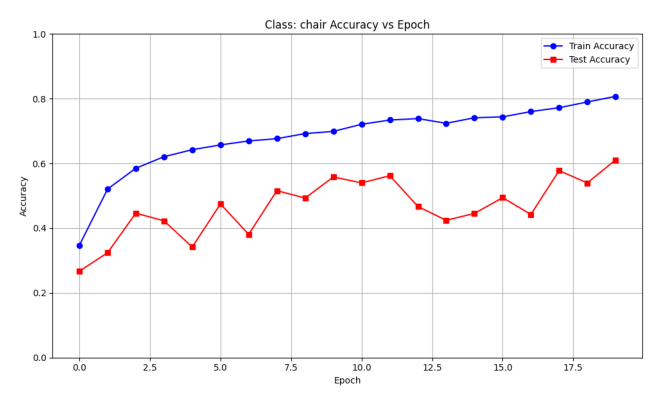

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Absolute path to the image (replace this with the actual path printed earlier)
image_path = '/content/pointnet.pytorch/part_segmentation_results/accuracy_vs_epoch.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')
plt.show()


**Mean Intersection over Union (mIoU) versus Number of Epochs (Analyzed over test set)**

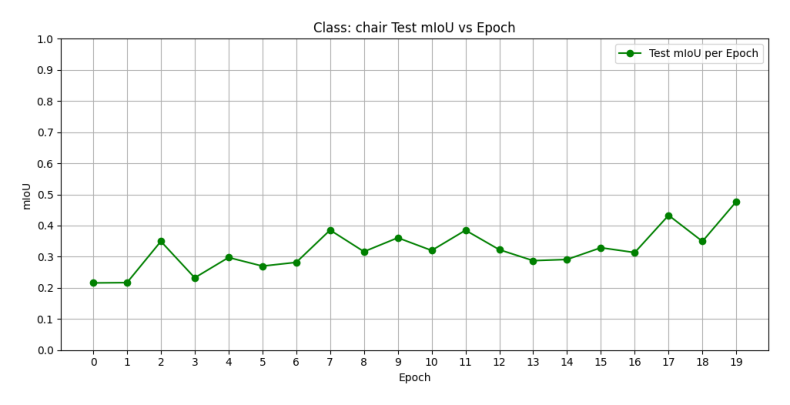

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Absolute path to the image (replace this with the actual path printed earlier)
image_path = '/content/pointnet.pytorch/part_segmentation_results/test_miou_versus_epoch.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')
plt.show()


**Hyperparameter Configuration 2:**

Number of epochs: 20

Learning rate: 0.003

Batch size: 32

Number of points sampled: 2000

In [47]:
!python "/content/pointnet.pytorch/utils/train_segmentation.py" \
  --dataset "/content/pointnet.pytorch/object_dataset_complete_with_parts" \
  --nepoch 20 \
  --num_points 2000\
  --batchSize 32 \
  --lr 0.003 \
  --class_choice "chair"




Namespace(batchSize=32, workers=4, nepoch=20, outf='seg', model='', dataset='/content/pointnet.pytorch/object_dataset_complete_with_parts', class_choice='chair', feature_transform=False, num_points=2000, lr=0.003)
Random Seed:  42
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Length of train dataset   =    286    ;   Length of test dataset   =    109
 Class chosen for part segmentation:  chair
 Part Segmentation Classes: [0, 2, 3, 4, 5]
 Number of Segmentation classes:  5
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:227: UserWarning: Detected call of `lr_schedul

**Accuracy Versus Number of Epochs**


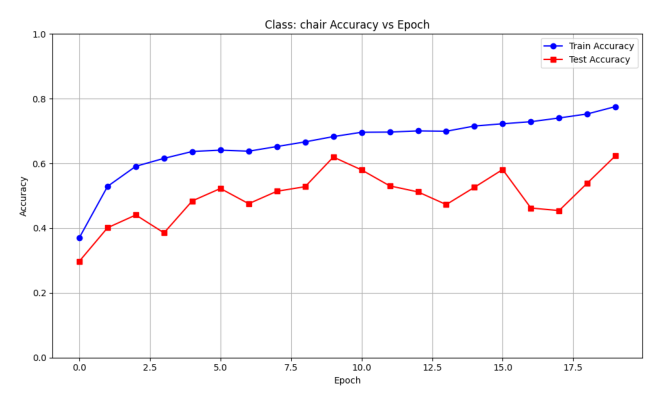

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Absolute path to the image (replace this with the actual path printed earlier)
image_path = '/content/pointnet.pytorch/part_segmentation_results/accuracy_vs_epoch.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')
plt.show()


**Mean Intersection over Union (mIoU) versus Number of Epochs (Analyzed over test set)**

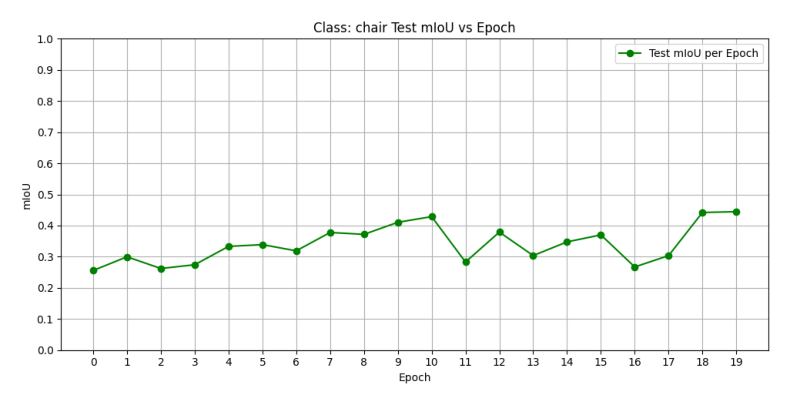

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Absolute path to the image (replace this with the actual path printed earlier)
image_path = '/content/pointnet.pytorch/part_segmentation_results/test_miou_versus_epoch.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')
plt.show()


**Hyperparameter Configuration 3:**

Number of epochs: 20

Learning rate: 0.001

Batch size: 64

Number of points sampled: 2000

In [51]:
!python "/content/pointnet.pytorch/utils/train_segmentation.py" \
  --dataset "/content/pointnet.pytorch/object_dataset_complete_with_parts" \
  --nepoch 20 \
  --num_points 2000\
  --batchSize 64 \
  --lr 0.001 \
  --class_choice "chair"




Namespace(batchSize=64, workers=4, nepoch=20, outf='seg', model='', dataset='/content/pointnet.pytorch/object_dataset_complete_with_parts', class_choice='chair', feature_transform=False, num_points=2000, lr=0.001)
Random Seed:  42
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Length of train dataset   =    286    ;   Length of test dataset   =    109
 Class chosen for part segmentation:  chair
 Part Segmentation Classes: [0, 2, 3, 4, 5]
 Number of Segmentation classes:  5
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:227: UserWarning: Detected call of `lr_schedul

**Accuracy Versus Number of Epochs**


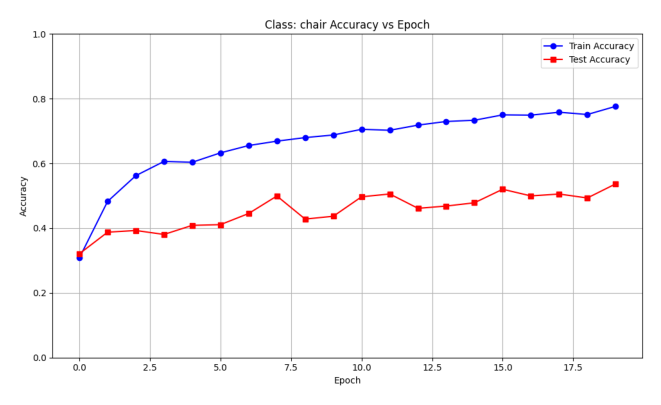

In [54]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Absolute path to the image (replace this with the actual path printed earlier)
image_path = '/content/pointnet.pytorch/part_segmentation_results/accuracy_vs_epoch.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')
plt.show()


**Mean Intersection over Union (mIoU) versus Number of Epochs (Analyzed over test set)**

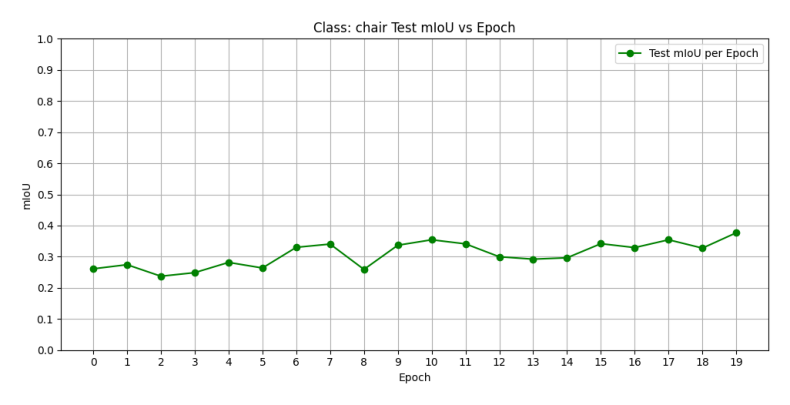

In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Absolute path to the image (replace this with the actual path printed earlier)
image_path = '/content/pointnet.pytorch/part_segmentation_results/test_miou_versus_epoch.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')
plt.show()


**Hyperparameter Configuration 4:**

Number of epochs: 20

Learning rate: 0.001

Batch size: 32

Number of points sampled: 5000

In [56]:
!python "/content/pointnet.pytorch/utils/train_segmentation.py" \
  --dataset "/content/pointnet.pytorch/object_dataset_complete_with_parts" \
  --nepoch 20 \
  --num_points 5000\
  --batchSize 32 \
  --lr 0.001 \
  --class_choice "chair"




Namespace(batchSize=32, workers=4, nepoch=20, outf='seg', model='', dataset='/content/pointnet.pytorch/object_dataset_complete_with_parts', class_choice='chair', feature_transform=False, num_points=5000, lr=0.001)
Random Seed:  42
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Length of train dataset   =    286    ;   Length of test dataset   =    109
 Class chosen for part segmentation:  chair
 Part Segmentation Classes: [0, 2, 3, 4, 5]
 Number of Segmentation classes:  5
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:227: UserWarning: Detected call of `lr_schedul

**Accuracy Versus Number of Epochs**


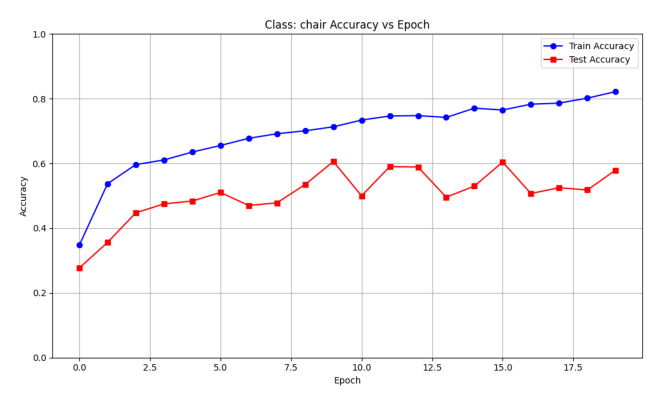

In [57]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Absolute path to the image (replace this with the actual path printed earlier)
image_path = '/content/pointnet.pytorch/part_segmentation_results/accuracy_vs_epoch.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')
plt.show()


**Mean Intersection over Union (mIoU) versus Number of Epochs (Analyzed over test set)**

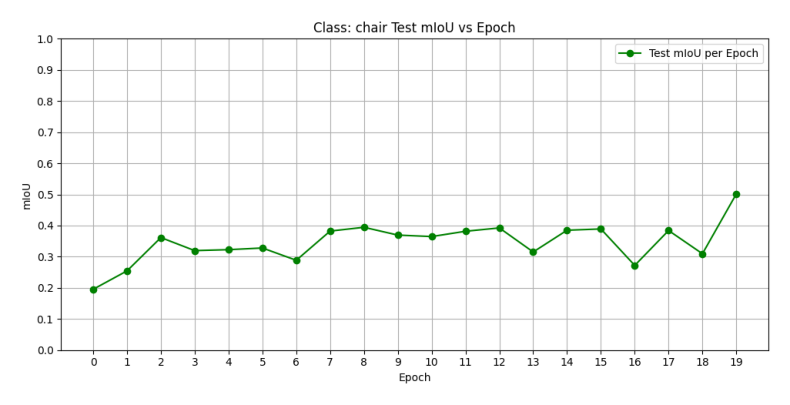

In [58]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Absolute path to the image (replace this with the actual path printed earlier)
image_path = '/content/pointnet.pytorch/part_segmentation_results/test_miou_versus_epoch.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')
plt.show()


**Predicted Samples**

<ipython-input-59-555845d17eeb>:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.95, 1])


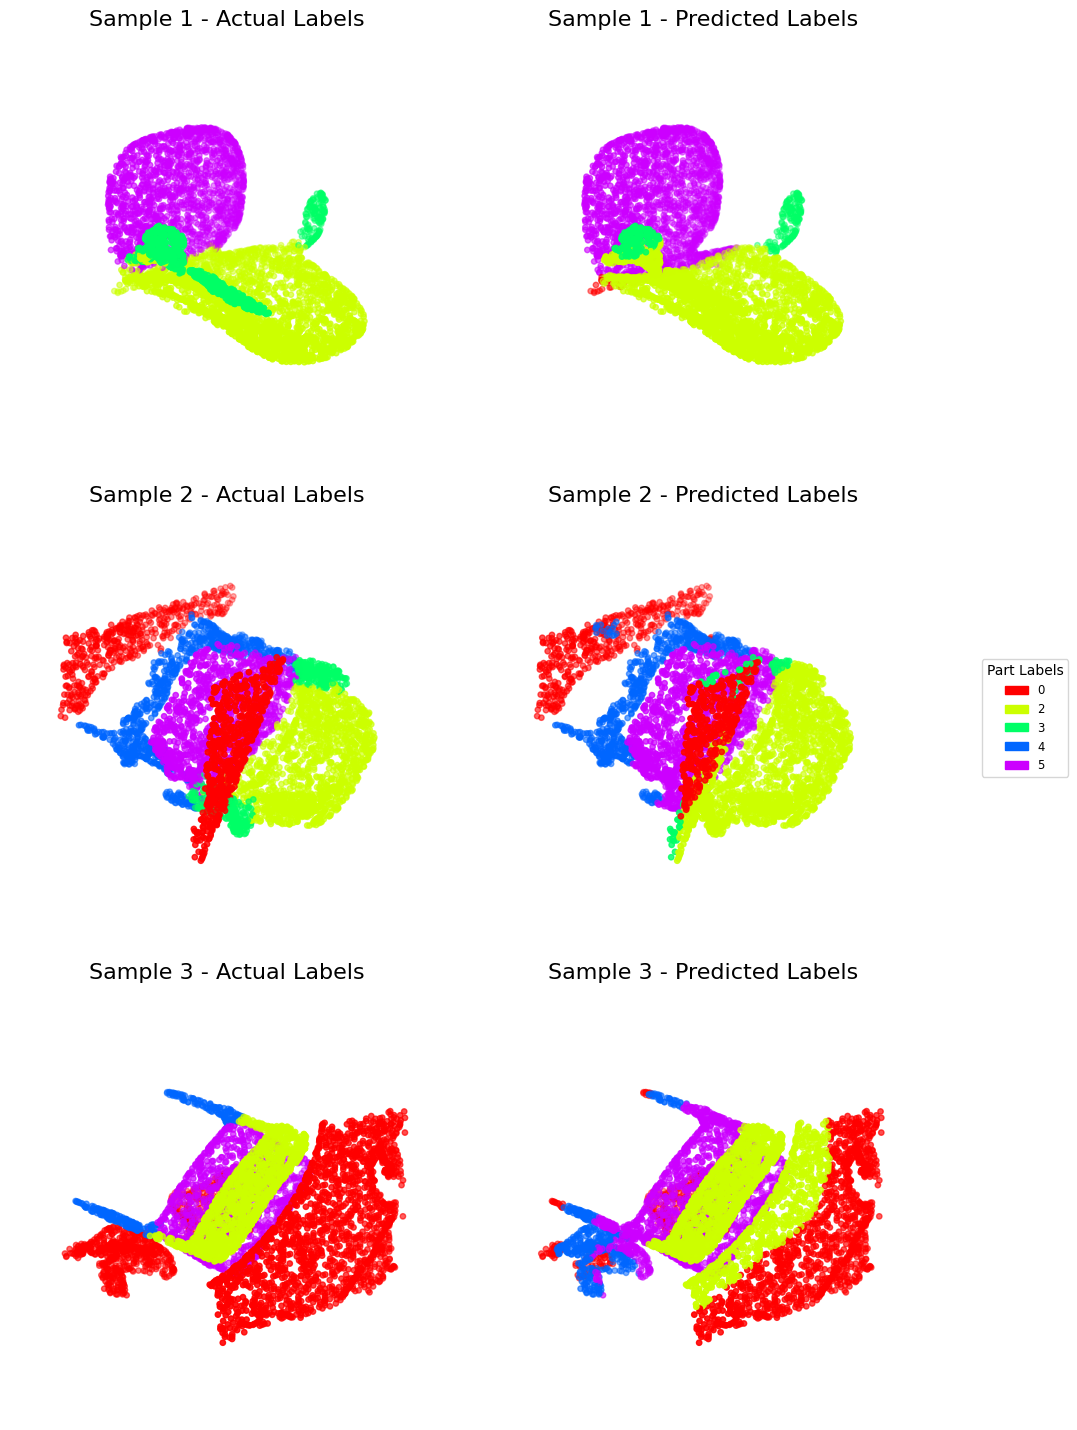

In [59]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec
from matplotlib.colors import hsv_to_rgb

h5_file_paths = [
    "part_segmentation_results/predicted_samples/sample_1.h5",
    "part_segmentation_results/predicted_samples/sample_2.h5",
    "part_segmentation_results/predicted_samples/sample_3.h5"
]

# Gather all unique labels
all_labels = set()
for path in h5_file_paths:
    with h5py.File(path, 'r') as f:
        actual = f['actual_raw_label'][:]
        predicted = f['predicted_raw_label'][:]
        all_labels.update(np.unique(actual))
        all_labels.update(np.unique(predicted))
all_labels = sorted(list(all_labels))

num_labels = len(all_labels)

# Map label to an index for color assignment
label_to_index = {label: idx for idx, label in enumerate(all_labels)}

# Generate distinct colors using HSV evenly spaced hues
def generate_distinct_colors(n):
    hues = np.linspace(0, 1, n, endpoint=False)  # hue values evenly spaced
    colors = [hsv_to_rgb([h, 1.0, 1.0]) for h in hues]  # full saturation and brightness
    return colors

distinct_colors = generate_distinct_colors(num_labels)

# Create label_colors dict mapping label -> RGB color
label_colors = {label: distinct_colors[label_to_index[label]] for label in all_labels}

def plot_pointcloud(ax, xyz, labels, title):
    ax.set_title(title, fontsize=16)
    ax.axis('off')
    colors = np.array([label_colors[label] for label in labels])
    ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=colors, s=15)
    ax.view_init(elev=20, azim=45)

fig = plt.figure(figsize=(12, 6 * len(h5_file_paths)))
gs = GridSpec(len(h5_file_paths), 2, figure=fig, wspace=0.05, hspace=0.1)

for i, path in enumerate(h5_file_paths):
    with h5py.File(path, 'r') as f:
        xyz = f['xyz'][:]
        actual_labels = f['actual_raw_label'][:]
        predicted_labels = f['predicted_raw_label'][:]

    ax_actual = fig.add_subplot(gs[i, 0], projection='3d')
    plot_pointcloud(ax_actual, xyz, actual_labels, f'Sample {i+1} - Actual Labels')

    ax_pred = fig.add_subplot(gs[i, 1], projection='3d')
    plot_pointcloud(ax_pred, xyz, predicted_labels, f'Sample {i+1} - Predicted Labels')

legend_patches = [Patch(color=label_colors[label], label=str(label)) for label in all_labels]
fig.legend(handles=legend_patches, loc='center right', title='Part Labels', fontsize='small', bbox_to_anchor=(1.02, 0.5))

plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()
